In [1]:
from cloudvolume import CloudVolume
from cloudvolume.lib import Bbox
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from brainlit.algorithms.detect_somas import find_somas

brain_url = "precomputed://https://dlab-colm.neurodata.io/2021_03_10/Mouse10-Cohort1/ch561-corrected"

mip = 0
cv = CloudVolume(brain_url, mip=mip, fill_missing=True)
res = cv.scales[mip]["resolution"]
print(res)

/cis/home/jteneggi/anaconda3/envs/cuda10/lib/python3.8/site-packages/python_jsonschema_objects/__init__.py:50: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  warnings.warn(


[3720, 3720, 4000]


In [2]:
size = int(100e3)
size_voxel = np.divide(size, res).astype(int)
# print(size_voxel)
soma_coords = [6111971, 3861535, 2813143]
soma_voxel = np.divide(soma_coords, res).astype(int)
print(soma_voxel)
vox_min = [int(u - size_voxel[i]/2) for i, u in enumerate(soma_voxel)]
vox_max = [int(u + size_voxel[i]/2) for i, u in enumerate(soma_voxel)]
# print(vox_min, vox_max)
bbox = Bbox(vox_min, vox_max)
volume = cv.download(bbox, mip=mip).squeeze()
print(volume.shape)

Downloading:  88%|████████▊ | 22/25 [00:00<00:00, 219.58it/s]

[1643 1038  703]


Downloading: 44it [00:00, 181.39it/s]                        

(26, 26, 25)


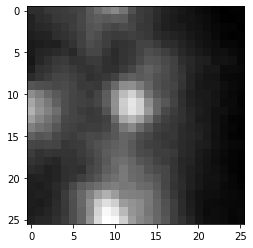

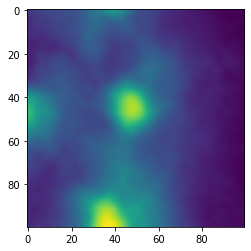

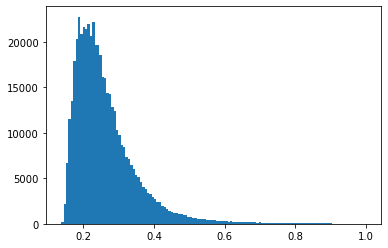

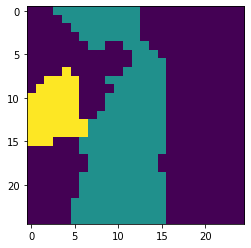

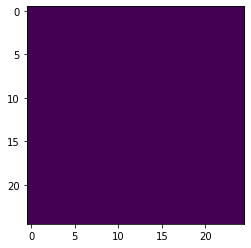

In [3]:
proj = np.amax(volume, axis=2)
plt.imshow(proj, cmap="gray")
plt.show()

desired_size = np.array([100, 100, 50])
zoom_factors = np.divide(desired_size, volume.shape)
out = ndimage.zoom(volume, zoom=zoom_factors)
out = out / np.max(out.flatten())
plt.imshow(np.amax(out, axis=2))
plt.show()
plt.hist(out.flatten(), bins=128)
plt.show()

label, rel_centroids, out = find_somas(volume, res)
out_proj = np.amax(out, axis=2)
plt.imshow(out_proj)
plt.show()